In [22]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
try:
    conn = mysql.connector.connect(
        user = '#', 
        password = '#,
        host = '#'
    )
except mysql.connector.Error as err:
    print("Conexão mal-sucedida, erro encontrado: {}".format)
    
user = conn.cursor()
query = "SELECT * FROM `looqbox-challenge`.`IMDB_movies`"
user.execute(operation = query)
data = user.fetchall()
columns = [desc[0] for desc in user.description]

df = pd.DataFrame(data = data, columns = columns)
df.head()

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325,40.0


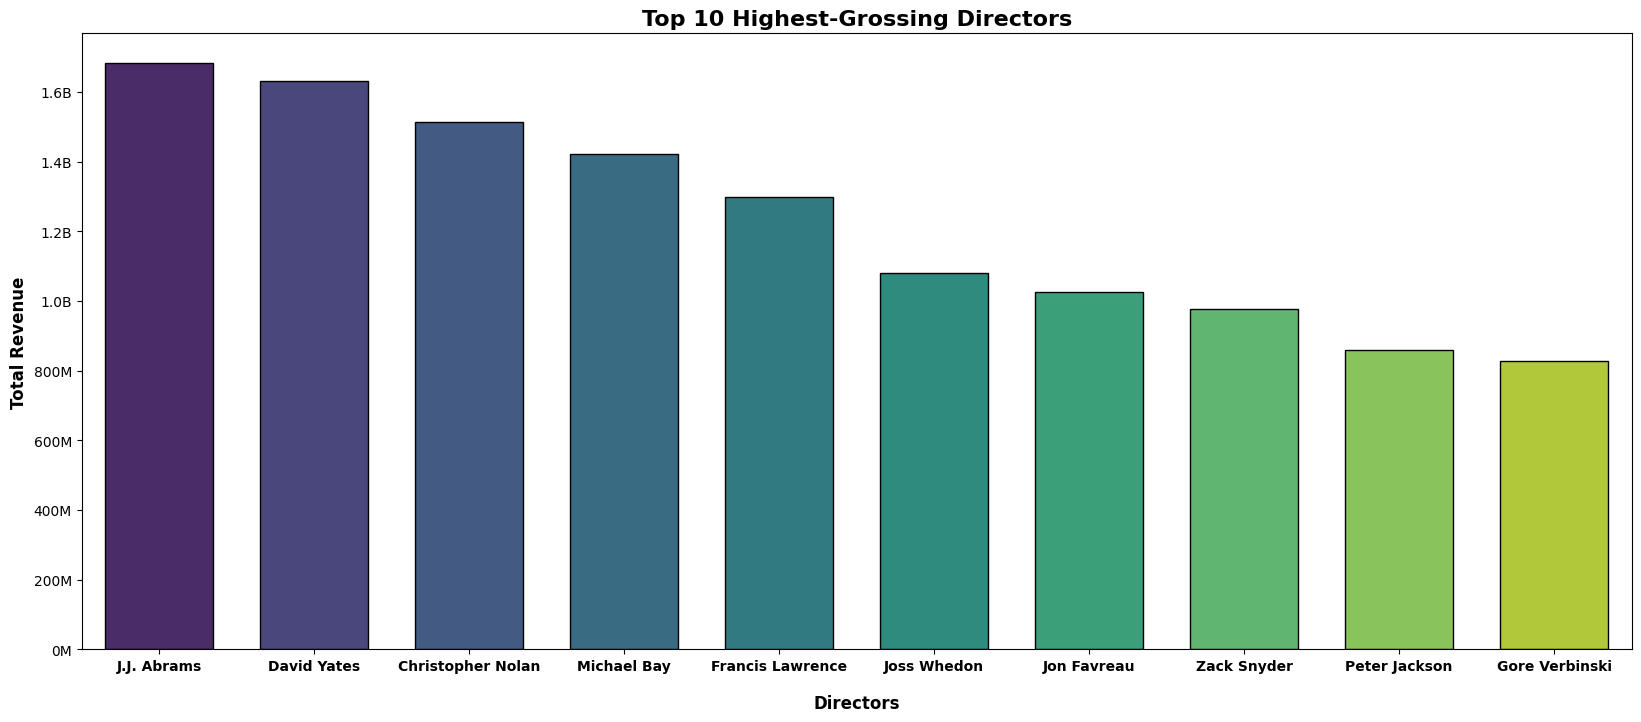

In [34]:
diretores_rentaveis = df.groupby('Director')['RevenueMillions'].sum().sort_values(ascending = False).head(10).reset_index()
diretores_rentaveis.rename(columns = {'RevenueMillions' : 'TotalRevenue'}, inplace = True)
# diretores_rentaveis['TotalRevenue'] = diretores_rentaveis['TotalRevenue'].apply(lambda x: f"{x/1000:.1f}B" if x >= 1000 else f"{x}M")

plt.figure(figsize = (20,8))
x = sns.barplot(data = diretores_rentaveis, 
                x = 'Director', 
                y = 'TotalRevenue', 
                palette = 'viridis', 
                hue = 'Director', 
                legend = False,
                edgecolor = 'Black',
                width = 0.7
                )
plt.title(label = 'Top 10 Highest-Grossing Directors', fontweight = 'bold', fontsize = 16)

plt.xlabel(xlabel = 'Directors', fontweight = 'bold', fontsize = 12, labelpad = 15)
plt.xticks(fontsize= 10, fontweight= 'bold', rotation=0)
plt.ylabel(ylabel = 'Total Revenue', fontweight = 'bold', fontsize = 12)

formatter = FuncFormatter(lambda x, _: f'{x/1000:.1f}B' if x >= 1000 else f'{x:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)
